# Data Science Project

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
url <- "https://drive.google.com/uc?export=download&id=1kBbW3nLa_kBrNruxi2itBmCwvUT29w8b" 
players_df <- read_csv(url)
head(players_df)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## Introduction:
### Data Description:



## Methods:




In [4]:
#finding the average values
players_average_values <- players_df |>
select(played_hours, Age) |>
summarize(across(played_hours:Age, mean, na.rm = TRUE))
players_average_values

#data wrangling
players_data_new <- players_df|>
rename(hashed_email = hashedEmail, age = Age) |>
filter(played_hours < 150.0, age != "NA") |>
select(played_hours, age,subscribe) |>
arrange(desc(played_hours))
head(players_data_new)

#mutate the response variable into factor data type
players_mutate<-players_data_new|>
mutate(subscribe=as_factor(subscribe))

head(players_mutate)

Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(played_hours:Age, mean, na.rm = TRUE)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


played_hours,age,subscribe
<dbl>,<dbl>,<lgl>
56.1,23,TRUE
53.9,17,TRUE
48.4,17,TRUE
32.0,22,TRUE
30.3,9,TRUE
23.7,24,TRUE


played_hours,age,subscribe
<dbl>,<dbl>,<fct>
56.1,23,TRUE
53.9,17,TRUE
48.4,17,TRUE
32.0,22,TRUE
30.3,9,TRUE
23.7,24,TRUE


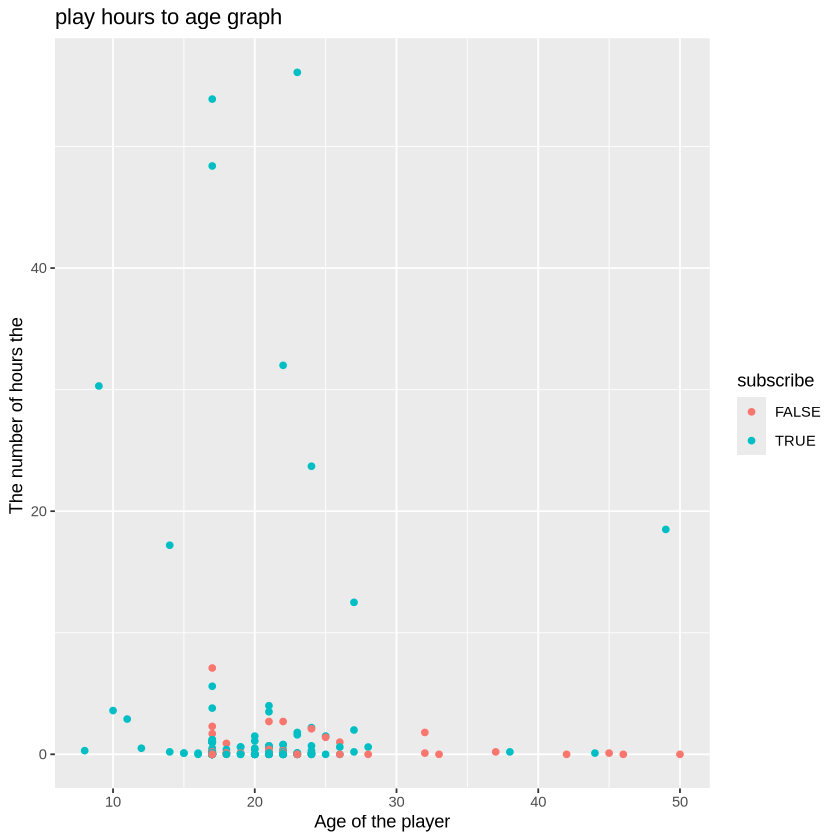

In [5]:
hours_to_age_plot <- players_mutate |>
   ggplot(aes(x = age, y = played_hours, color = subscribe)) + 
       geom_point(alpha = 1) + # Deals with the transparency of the points, set it to an appropiate value
        xlab("Age of the player") +
        ylab("The number of hours the ") +
       ggtitle("play hours to age graph")

hours_to_age_plot

explain what we did^ and then explain why we scale

In [6]:
#data_wrangling scaled values 




set.seed(3456) 

# Randomly take 75% of the data in the training set. 
# This will be proportional to the different number of fruit names in the dataset.

players_df_split <- initial_split(players_mutate, prop = 0.75, strata = subscribe)  
players_df_train <- training(players_df_split)
players_df_test <- testing(players_df_split)

head(players_df_train)
head(players_df_test)


played_hours,age,subscribe
<dbl>,<dbl>,<fct>
7.1,17,FALSE
2.7,22,FALSE
2.7,21,FALSE
2.1,24,FALSE
1.8,32,FALSE
1.7,17,FALSE


played_hours,age,subscribe
<dbl>,<dbl>,<fct>
48.4,17,TRUE
32.0,22,TRUE
30.3,9,TRUE
23.7,24,TRUE
18.5,49,TRUE
5.6,17,TRUE


In [8]:
#making recpie 

players_recipe <- recipe(subscribe ~ played_hours + age, data = players_df_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors()) 

players_recipe_scaled <- players_recipe |>
prep() |>
bake(players_df_train)
head(players_recipe_scaled)

played_hours,age,subscribe
<dbl>,<dbl>,<fct>
0.83971134,-0.62528194,FALSE
0.18545065,0.17752127,FALSE
0.18545065,0.01696063,FALSE
0.09623329,0.49864256,FALSE
0.05162460,1.78312770,FALSE
0.03675504,-0.62528194,FALSE
